In [1]:
%matplotlib inline
import os, sys, math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier

## Load data

In [2]:
# correlations between asset classes

S = pd.read_csv('assetclass_correlation_202002.csv', index_col=0)

In [3]:
S

Stock-US  Stock-Jpn/EU  Stock-Emerging  Bonds-US  \
Class                                                                 
Stock-US                1.0           0.9             0.7      -0.2   
Stock-Jpn/EU            0.9           1.0             0.8      -0.1   
Stock-Emerging          0.7           0.8             1.0       0.0   
Bonds-US               -0.2          -0.1             0.0       1.0   
Bonds-PriceLinked       0.0           0.1             0.2       0.8   
Gold                    0.0           0.1             0.3       0.4   
RealEstate              0.6           0.6             0.5       0.3   

                   Bonds-PriceLinked  Gold  RealEstate  
Class                                                   
Stock-US                         0.0   0.0         0.6  
Stock-Jpn/EU                     0.1   0.1         0.6  
Stock-Emerging                   0.2   0.3         0.5  
Bonds-US                         0.8   0.4         0.3  
Bonds-PriceLinked                1.0   0.5         0.4  
Gold                             0.5   1.0         0.1  
RealEstate                       0.4   0.1         1.0

In [4]:
S.index

Index(['Stock-US', 'Stock-Jpn/EU', 'Stock-Emerging', 'Bonds-US',
       'Bonds-PriceLinked', 'Gold', 'RealEstate'],
      dtype='object', name='Class')

In [5]:
S = S.drop(index='Bonds-PriceLinked').drop('Bonds-PriceLinked', axis='columns')
S

Stock-US  Stock-Jpn/EU  Stock-Emerging  Bonds-US  Gold  \
Class                                                                    
Stock-US             1.0           0.9             0.7      -0.2   0.0   
Stock-Jpn/EU         0.9           1.0             0.8      -0.1   0.1   
Stock-Emerging       0.7           0.8             1.0       0.0   0.3   
Bonds-US            -0.2          -0.1             0.0       1.0   0.4   
Gold                 0.0           0.1             0.3       0.4   1.0   
RealEstate           0.6           0.6             0.5       0.3   0.1   

                RealEstate  
Class                       
Stock-US               0.6  
Stock-Jpn/EU           0.6  
Stock-Emerging         0.5  
Bonds-US               0.3  
Gold                   0.1  
RealEstate             1.0

In [6]:
cor = S.values
#print(S.shape)

In [7]:
cor

array([[ 1. ,  0.9,  0.7, -0.2,  0. ,  0.6],
       [ 0.9,  1. ,  0.8, -0.1,  0.1,  0.6],
       [ 0.7,  0.8,  1. ,  0. ,  0.3,  0.5],
       [-0.2, -0.1,  0. ,  1. ,  0.4,  0.3],
       [ 0. ,  0.1,  0.3,  0.4,  1. ,  0.1],
       [ 0.6,  0.6,  0.5,  0.3,  0.1,  1. ]])

In [8]:
name = list(S.columns.values)

In [9]:
name

['Stock-US',
 'Stock-Jpn/EU',
 'Stock-Emerging',
 'Bonds-US',
 'Gold',
 'RealEstate']

In [10]:
# risk of each class

risk = {}
risk["Stock-US"] = 12.5/100
risk["Stock-Jpn/EU"] = 13.6/100
risk["Stock-Emerging"] = 16.7/100
risk["Bonds-US"] = 3.1/100
#risk["Bonds-PriceLinked"] = 4.1/100
risk["Gold"] = 15.0/100
risk["RealEstate"] = 13.4/100

In [11]:
# convert to numpy array

risk = np.array(list(risk.values()))
#risk = risk.reshape(len(risk),1)
#print(risk.shape)

In [12]:
risk

array([0.125, 0.136, 0.167, 0.031, 0.15 , 0.134])

In [13]:
# expected return from each class

val = {}
val["Stock-US"] = 7.2/100
val["Stock-Jpn/EU"] = 7.7/100
val["Stock-Emerging"] = (8.5+0.00000000001)/100
val["Bonds-US"] = 2.3/100
#val["Bonds-PriceLinked"] = 2.6/100
val["Gold"] = 3.8/100
val["RealEstate"] = 5.7/100

In [14]:
# convert to numpy array

val = np.array(list(val.values()))
#val = val.reshape(len(val),1)
#print(val.shape)

In [15]:
val

array([0.072, 0.077, 0.085, 0.023, 0.038, 0.057])

## Visualize asset classes

In [16]:
#plt.rcParamsDefault

In [17]:
# fontsize: xx-small, x-small, small, medium, large, x-large, xx-large
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
#plt.rcParams.update(plt.rcParamsDefault)

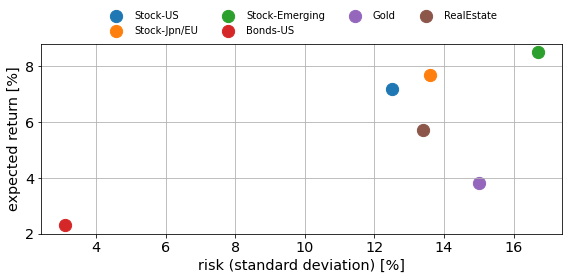

In [18]:
# figureを生成
fig = plt.figure()

# axをfigureに設定
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('risk (standard deviation) [%]')
ax.set_ylabel('expected return [%]')
#ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
ax.grid(True)

for i,j,k in zip(risk, val, name):
    ax.scatter(i*100, j*100, s=150, label=k)
    #ax.annotate(k, xy=(i, j))
    
#ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=10, frameon=False)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), borderaxespad=0, ncol=4, fontsize=10, frameon=False)

plt.tight_layout()

plt.savefig("assetclass.png")

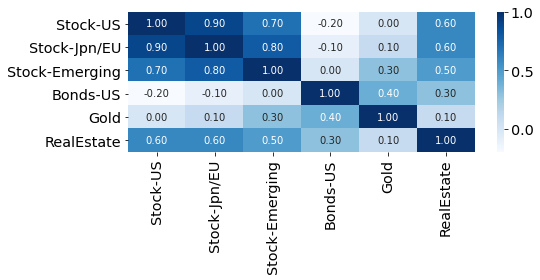

In [19]:
# heatmap
plt.figure()
sns.heatmap(cor, annot=True, xticklabels=name, yticklabels=name, cmap='Blues', fmt='.2f')
plt.tight_layout()
plt.savefig("assetclass_heatmap.png")

## Diagonalize risk vector and obtain covariance matrix using correlation matrix

In [20]:
r_diag = np.diag(risk)

In [21]:
r_diag

array([[0.125, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.136, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.167, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.031, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.15 , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.134]])

In [22]:
cov = np.dot(np.dot(r_diag, cor), r_diag)

In [23]:
cov

array([[ 0.015625 ,  0.0153   ,  0.0146125, -0.000775 ,  0.       ,
         0.01005  ],
       [ 0.0153   ,  0.018496 ,  0.0181696, -0.0004216,  0.00204  ,
         0.0109344],
       [ 0.0146125,  0.0181696,  0.027889 ,  0.       ,  0.007515 ,
         0.011189 ],
       [-0.000775 , -0.0004216,  0.       ,  0.000961 ,  0.00186  ,
         0.0012462],
       [ 0.       ,  0.00204  ,  0.007515 ,  0.00186  ,  0.0225   ,
         0.00201  ],
       [ 0.01005  ,  0.0109344,  0.011189 ,  0.0012462,  0.00201  ,
         0.017956 ]])

In [24]:
df = pd.DataFrame(cov, index = name, columns=name)
df

Stock-US  Stock-Jpn/EU  Stock-Emerging  Bonds-US      Gold  \
Stock-US        0.015625      0.015300        0.014612 -0.000775  0.000000   
Stock-Jpn/EU    0.015300      0.018496        0.018170 -0.000422  0.002040   
Stock-Emerging  0.014612      0.018170        0.027889  0.000000  0.007515   
Bonds-US       -0.000775     -0.000422        0.000000  0.000961  0.001860   
Gold            0.000000      0.002040        0.007515  0.001860  0.022500   
RealEstate      0.010050      0.010934        0.011189  0.001246  0.002010   

                RealEstate  
Stock-US          0.010050  
Stock-Jpn/EU      0.010934  
Stock-Emerging    0.011189  
Bonds-US          0.001246  
Gold              0.002010  
RealEstate        0.017956

## Optimize asset classes with upper and lower bounds (weights of each asset class must be between 5% ~ 35%)

In [25]:
#　効率的フォロンティア (efficient frontier)を計算

vmin, vmax, vdelta = 0.04, 0.07, 0.002     #　要求リターン: 4% ~ 7%を0.2%刻みで計算
trets = np.arange(vmin, vmax+vdelta, vdelta)

# 資産クラスの重みを一律に5% ~ 35%に設定
ef = EfficientFrontier(val, df, weight_bounds=(0.05, 0.35))

In [26]:
#ef.max_quadratic_utility(risk_aversion=4)

In [27]:
def calc_weight(ef, trets):

    tvols = []
    tweights = []
    
    for tr in trets:
        w = ef.efficient_return(target_return=float(tr))
        #print(tr, w)
        w = pd.Series(w).values
        v = np.sqrt(np.dot(w.T, np.dot(cov, w)))
        tvols += [v]
        tweights += [w]
        
    return tvols, tweights

In [28]:
tvols, tweights = calc_weight(ef, trets)

#### Plot

In [29]:
def plot_portfolio(tweights, trets, name, vmin, vmax, ofile):

    tweights = np.array(tweights) * 100
    trets = trets * 100
    
    #dfWeights = pd.DataFrame(tweights, index = trets, columns = name)
    #dfWeights = pd.DataFrame(np.array(tweights).clip(0), index = trets, columns = name)   # convert negative values in tweights to zero
    dfWeights = pd.DataFrame(tweights.clip(0), index = trets, columns = name)   # convert negative values in tweights to zero
    dfWeights.plot.area()

    plt.xlabel("expected return [%]")
    plt.ylabel("weight [%]")
    plt.xlim(vmin*100,vmax*100)
    plt.ylim([0,100])

    plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=14, frameon=False)
    #plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), borderaxespad=0, ncol=4, fontsize=10, frameon=False)

    plt.tight_layout()

    #plt.show()
    #plt.savefig("assetclass_opt_portfolio.png")
    plt.savefig(ofile)
    
    return dfWeights

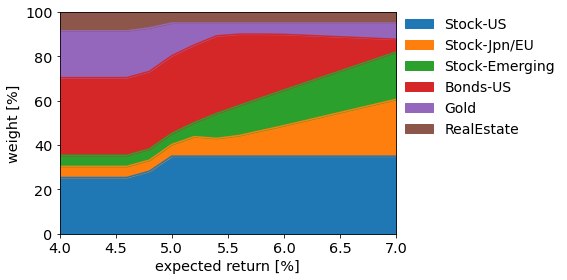

In [30]:
filename = "weights_with_bounds.png"
dfWeights = plot_portfolio(tweights, trets, name, vmin, vmax, filename)

#### volarity vs expected return from optimal portfolio

In [31]:
volarity = np.array(tvols)*100
expected_return = np.array(trets)*100

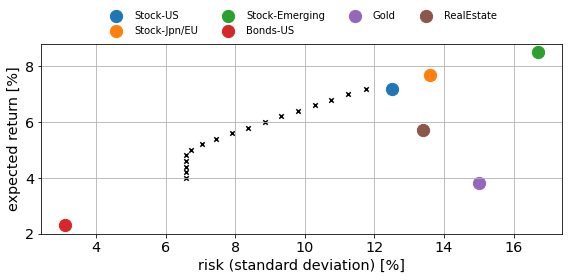

In [32]:
# figureを生成
fig = plt.figure()

# axをfigureに設定
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('risk (standard deviation) [%]')
ax.set_ylabel('expected return [%]')
ax.grid(True)

for i,j,k in zip(risk, val, name):
    ax.scatter(i*100, j*100, s=150, label=k)

ax.scatter(volarity, expected_return, s=20, marker="x", color="k")
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), borderaxespad=0, ncol=4, fontsize=10, frameon=False)

plt.tight_layout()

plt.savefig("assetclass_ef_with_bounds.png")
#plt.show()

### check maximum return

In [33]:
for n in name:
    print("{:18s} maximum return: {:6.2f}%    risk level: {:4.2f}%".format(n, np.round(dfWeights[n].max(),2), np.round(dfWeights[n].idxmax(),2)))

Stock-US           maximum return:  35.00%    risk level: 5.00%
Stock-Jpn/EU       maximum return:  25.59%    risk level: 7.00%
Stock-Emerging     maximum return:  29.40%    risk level: 7.20%
Bonds-US           maximum return:  35.00%    risk level: 4.00%
Gold               maximum return:  21.10%    risk level: 4.20%
RealEstate         maximum return:   8.52%    risk level: 4.00%


In [34]:
dfWeights.loc[dfWeights["Stock-US"].idxmax()]

Stock-US          35.00000
Stock-Jpn/EU       5.25641
Stock-Emerging     5.00000
Bonds-US          35.00000
Gold              14.74359
RealEstate         5.00000
Name: 5.000000000000001, dtype: float64

In [35]:
dfWeights.tail(20)

Stock-US  Stock-Jpn/EU  Stock-Emerging   Bonds-US       Gold  RealEstate
4.0  25.386497      5.000000        5.000000  35.000000  21.097547    8.515956
4.2  25.386497      5.000000        5.000000  35.000000  21.097547    8.515956
4.4  25.386497      5.000000        5.000000  35.000000  21.097547    8.515956
4.6  25.386497      5.000000        5.000000  35.000000  21.097547    8.515956
4.8  28.195326      5.000000        5.000000  35.000000  19.627889    7.176785
5.0  35.000000      5.256410        5.000000  35.000000  14.743590    5.000000
5.2  35.000000      8.796010        6.318204  35.000000   9.885786    5.000000
5.4  35.000000      8.011664       11.224364  35.000000   5.763972    5.000000
5.6  35.000000      9.294688       13.517530  32.187782   5.000000    5.000000
5.8  35.000000     11.507711       14.815865  28.676424   5.000000    5.000000
6.0  35.000000     13.763827       16.046948  25.066387   5.122839    5.000000
6.2  35.000000     16.129214       17.107499  21.206120   5.557167    5.000000
6.4  35.000000     18.494602       18.168049  17.345853   5.991496    5.000000
6.6  35.000000     20.859989       19.228600  13.485586   6.425825    5.000000
6.8  35.000000     23.225377       20.289151   9.625319   6.860153    5.000000
7.0  35.000000     25.590764       21.349701   5.765052   7.294482    5.000000
7.2  34.042692     21.555625       29.401683   5.000000   5.000000    5.000000

In [36]:
v = np.array(dfWeights.tail(1)).flatten()

In [37]:
label = list(dfWeights.columns)

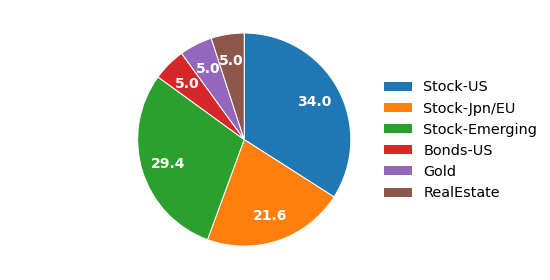

In [38]:
plt.pie(v, labels=label, counterclock=False, startangle=90,
        labeldistance=1.1, 
        autopct=lambda p:'{:.1f}'.format(p), 
        #autopct="%1.1f%%",
        pctdistance=0.75, 
        textprops={'color': "white", 'weight': "bold", 'fontsize': "14"},
        wedgeprops={'linewidth': 1, 'edgecolor':"white"})

plt.legend(bbox_to_anchor=(1.0, 0.25, 1.50, 0.5), loc="center left", borderaxespad=0., frameon=False)
plt.tight_layout()

plt.savefig("portfolio_target_return_with_bounds.png")

## Optimize asset classes without upper and lower bounds

In [39]:
#　効率的フォロンティア (efficient frontier)を計算

vmin, vmax, vdelta = 0.04, 0.08, 0.002     #　要求リターン: 4% ~ 8%を0.2%刻みで計算
trets = np.arange(vmin, vmax+vdelta, vdelta)
#print(trets)

ef = EfficientFrontier(val, df)

In [40]:
tvols, tweights = calc_weight(ef, trets)

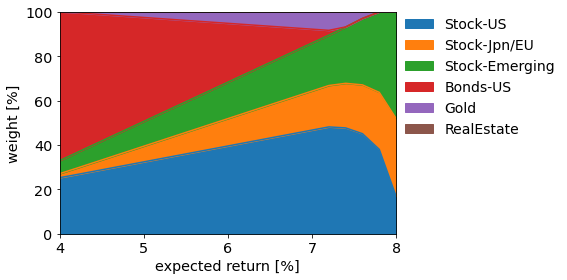

In [41]:
filename = "weights_without_bounds.png"
dfWeights = plot_portfolio(tweights, trets, name, vmin, vmax, filename)

#### check maximum return

In [42]:
for n in name:
    print("{:18s} maximum return: {:6.2f}%    risk level: {:4.2f}%".format(n, np.round(dfWeights[n].max(),2), np.round(dfWeights[n].idxmax(),2)))

Stock-US           maximum return:  48.17%    risk level: 7.20%
Stock-Jpn/EU       maximum return:  35.06%    risk level: 8.00%
Stock-Emerging     maximum return:  48.05%    risk level: 8.00%
Bonds-US           maximum return:  67.05%    risk level: 4.00%
Gold               maximum return:   8.31%    risk level: 7.20%
RealEstate         maximum return:   0.00%    risk level: 4.00%


In [43]:
dfWeights.loc[dfWeights["Stock-US"].idxmax()]

Stock-US          48.172453
Stock-Jpn/EU      18.649621
Stock-Emerging    22.707416
Bonds-US           2.163143
Gold               8.307368
RealEstate         0.000000
Name: 7.200000000000004, dtype: float64

In [44]:
dfWeights

Stock-US  Stock-Jpn/EU  Stock-Emerging   Bonds-US      Gold  RealEstate
4.0  25.293277      1.793175        5.867709  67.045839  0.000000         0.0
4.2  26.680792      2.844388        6.984797  63.090902  0.399121         0.0
4.4  28.113569      3.898070        8.032972  59.029052  0.926337         0.0
4.6  29.546347      4.951752        9.081147  54.967201  1.453554         0.0
4.8  30.979124      6.005435       10.129321  50.905350  1.980770         0.0
5.0  32.411901      7.059117       11.177496  46.843500  2.507986         0.0
5.2  33.844679      8.112799       12.225670  42.781649  3.035203         0.0
5.4  35.277456      9.166481       13.273845  38.719798  3.562419         0.0
5.6  36.710234     10.220163       14.322019  34.657948  4.089636         0.0
5.8  38.143011     11.273845       15.370194  30.596097  4.616852         0.0
6.0  39.575789     12.327528       16.418368  26.534247  5.144069         0.0
6.2  41.008566     13.381210       17.466543  22.472396  5.671285         0.0
6.4  42.441343     14.434892       18.514717  18.410545  6.198502         0.0
6.6  43.874121     15.488574       19.562892  14.348695  6.725718         0.0
6.8  45.306898     16.542256       20.611067  10.286844  7.252935         0.0
7.0  46.739676     17.595938       21.659241   6.224994  7.780151         0.0
7.2  48.172453     18.649621       22.707416   2.163143  8.307368         0.0
7.4  47.721481     20.094898       25.399333   0.000000  6.784289         0.0
7.6  45.124406     21.986308       29.963919   0.000000  2.925367         0.0
7.8  38.038298     25.687767       36.273936   0.000000  0.000000         0.0
8.0  16.885440     35.061159       48.053400   0.000000  0.000000         0.0

In [45]:
v = np.array(dfWeights.tail(1)).flatten()

In [46]:
label = list(dfWeights.columns)

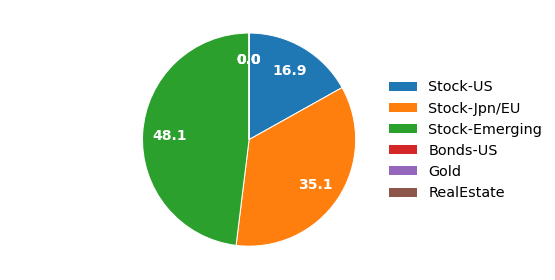

In [47]:
plt.pie(v, labels=label, counterclock=False, startangle=90,
        labeldistance=1.1, 
        autopct=lambda p:'{:.1f}'.format(p), 
        #autopct="%1.1f%%",
        pctdistance=0.75, 
        textprops={'color': "white", 'weight': "bold", 'fontsize': "14"},
        wedgeprops={'linewidth': 1, 'edgecolor':"white"})

plt.legend(bbox_to_anchor=(1.0, 0.25, 1.50, 0.5), loc="center left", borderaxespad=0., frameon=False)
plt.tight_layout()

plt.savefig("portfolio_target_return_without_bounds.png")
#plt.show()